In [1]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import h5py
def keys(f):
    return [key for key in f.keys()]
import scipy
from scipy import signal
from scipy.fftpack import fft, fftshift ,ifft
import gwpy
from gwpy.timeseries import TimeSeries
from scipy.interpolate import CubicSpline as spline

#h5py.run_tests()
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c

In [3]:
lamda=np.load('results/lamda.npy')
q=np.load('results/q.npy')
rhM=np.load('results/rhM.npy')
dtM=np.load('results/dtM.npy')
freq=np.load('results/freq.npy')
zeta=np.load('results/zeta.npy')
mas=np.load('results/mas.npy')

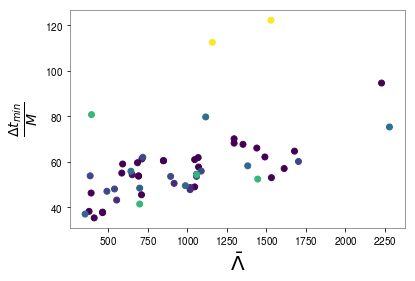

In [4]:
fig1=plt.figure()
plt.scatter(lamda,dtM,c=q)
plt.xlabel('lamda')
plt.ylabel('dtM')
plt.xlabel(r'$\bar{\Lambda}$',fontsize=20)
plt.ylabel(r'$\frac{Δt_{min}}{M}$',fontsize=20)
plt.grid(False)
#plt.title('',fontsize=20)
plt.show()

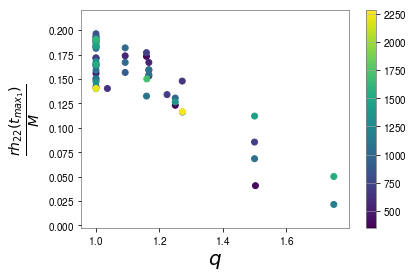

In [10]:
plt.scatter(q,rhM,c=lamda)
plt.colorbar()
plt.xlabel(r'$q$',fontsize=20)
plt.ylabel(r'$\frac{rh_{22}(t_{max_1})}{M}$',fontsize=20)
#plt.title("",fontsize=20)
plt.grid(False)
plt.show()

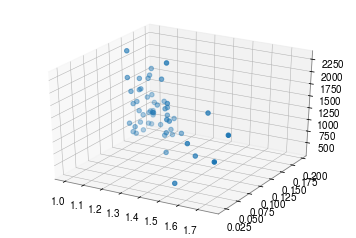

In [6]:

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(q,rhM,lamda)
plt.show()

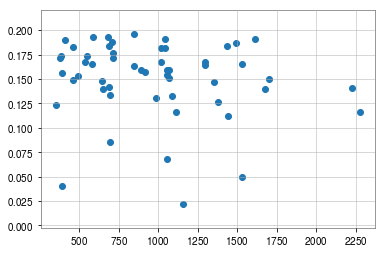

In [7]:
plt.scatter(lamda,rhM)

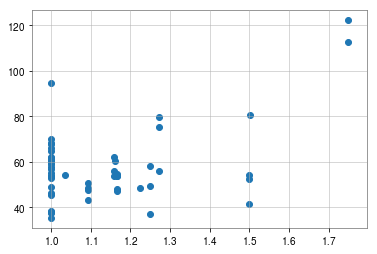

In [8]:
plt.scatter(q,dtM)

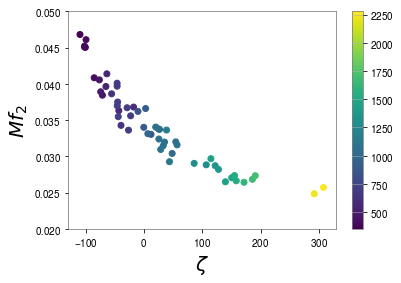

In [14]:
plt.scatter(zeta,mas*freq,c=lamda)
plt.colorbar()
plt.xlabel(r'$\zeta$',fontsize=20)
plt.ylabel(r'$Mf_2$',fontsize=20)
plt.ylim(0.02,0.05)
#plt.title("",fontsize=20)
plt.grid(False)
plt.show()